## Description 
This program uses an artificial recurrent nueral network called Long Short Term Memory (LSTM) <br>
to predict the closing stock prive of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Get the stock quote
df = web.DataReader('BTC-USD', data_source='yahoo', start='2012-01-01', end='2021-12-17')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-12-13,50205.000000,45894.847656,50114.742188,46737.480469,3.216673e+10,46737.480469
2021-12-14,48431.398438,46424.496094,46709.824219,46612.632812,3.463862e+10,46612.632812
2021-12-15,49473.957031,46671.964844,48379.753906,48896.722656,3.654183e+10,48896.722656


In [7]:
# Get the number of rows and columns in the data set
df.shape

(2645, 6)

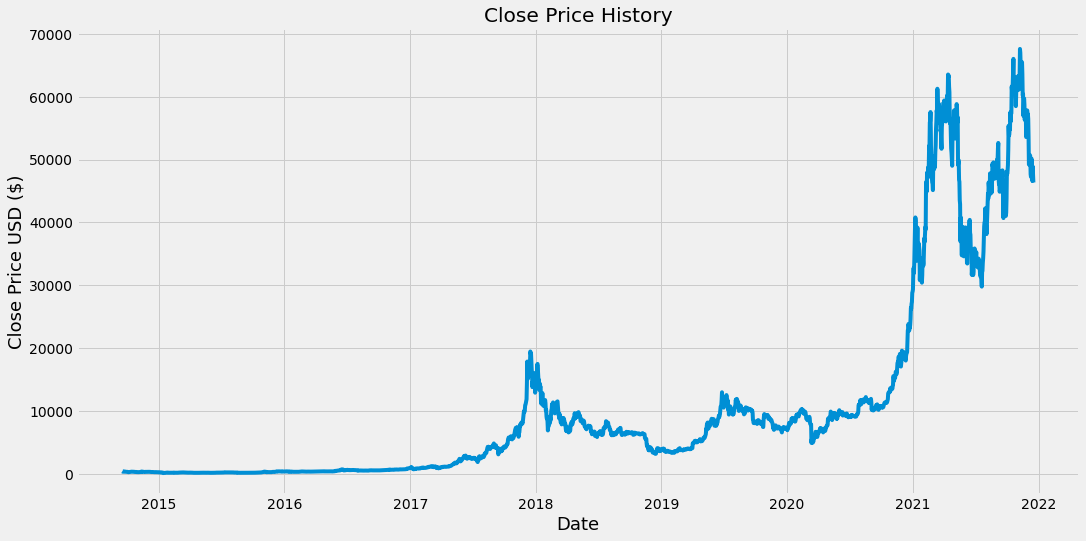

In [8]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe with only the CLose column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model (for training set using only 80% of the dataset)
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2116

In [10]:
# Scale the data

# It is adnatagous to apply preprocessing transformations, scaling, and/or normalizations to the input data
# before it is presented to a nueral network, and it helps the model (usually)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # computes the min and max values to be used and then transforms the data based on the two values

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.72294912],
       [0.70467757],
       [0.68518473]])

In [11]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :] #contains all values from 0 to training data length, and get back all of the columns

# Split the data into x_train and y_train data sets

x_train = [] # the independent training variables or the training variables
y_train = [] # the dependent variables or the target variable

# append the past 60 values to the x_train data set
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # will contain 60 values from index 0 to 59
    y_train.append(train_data[i, 0]) # will contain the 61st value as index 60
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

In [12]:
# Convert the x_train and the y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshape the data - Why?
# An LSTM network expects the input data to be 3 dimensional in the form of (number of samples, number of time steps, number of features)
# Right now, the x_train data set shows the number of rows and columns only (2 dimensional)
x_train.shape 

(2056, 60)

In [14]:
# the number of samples = the number of rows that we have which is 1543
# the number of timesteps = 60 (our window) or the number of columns
# the number of features = 1 (our closing price)
# x_train = np.reshape(x_train, (1543, 60, 1)

# a more robust way to write the above line
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2056, 60, 1)

## Build the LSTM Model

In [15]:
model = Sequential()

# - add a LSTM layer to our model, which will have 50 neurons
# - return_sequences=True because we will be using another LSTM layer
# - because it is the first layer, we need to provide an input shape 
#   which will be the number of timesteps (60) and number of features (1)
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
          
# - add a second LSTM layer with 50 neurons again
# - return_sequences=False because we will NOT be using another LSTM layer for our models architecture
model.add(LSTM(50, return_sequences=False))

# adding a Dense layer with 25 neurons, this is just a regularly densly connected neural net layer
model.add(Dense(25))

model.add(Dense(1))

In [16]:
# Compile the model

# giving model an optimizer and loss function
# an optimizer is used to improve upon the loss function
# and the loss function is used to measure how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model

# batch_size = total number of training samples present in a single batch
# epoch is the number of iterations when an entire data set is passed forward and backward through a neural net
model.fit(x_train, y_train, batch_size=1, epochs=1)

2056/2056 [==============================] - 35s 14ms/step - loss: 3.8497e-04


In [18]:
# Create the test dataset
# Create a new array containin scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: df.shape[0], :]

# Create the dataset x_tests and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict - these values are NOT scaled

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
# Convert the data to a numpy array so that we can use it in the LSTM model
x_test = np.array(x_test)

In [20]:
x_test.shape

(529, 60)

In [21]:
# Reshape the data because the data is 2 dimensional and we need 3 dimensional for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# Get the models predicted price values
predictions = model.predict(x_test)
# inverse transform the data
predictions = scaler.inverse_transform(predictions) #unscaling the values to be original values (USD price)

## Evaluate our model

In [23]:
# Get the root mean squared error (RMSE)
# - This is a good measure of how accurate the model predicts to response
# - Its is the standard deviation of the residuals
# - The lower values of RMSE indicate a better fit
# Usually you would want to evaluate your model with other metrics as well, to truely get a better idea of how your model performs

rmse = np.sqrt( np.mean(predictions-y_test)**2 )
rmse # a value of 0 would indicate the model predicted perfectly, exactly as it was suppose to be from the testing data... why am I getting 0.4 xD

1278.013066369329

<ipython-input-24-c3d53ef0c4ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


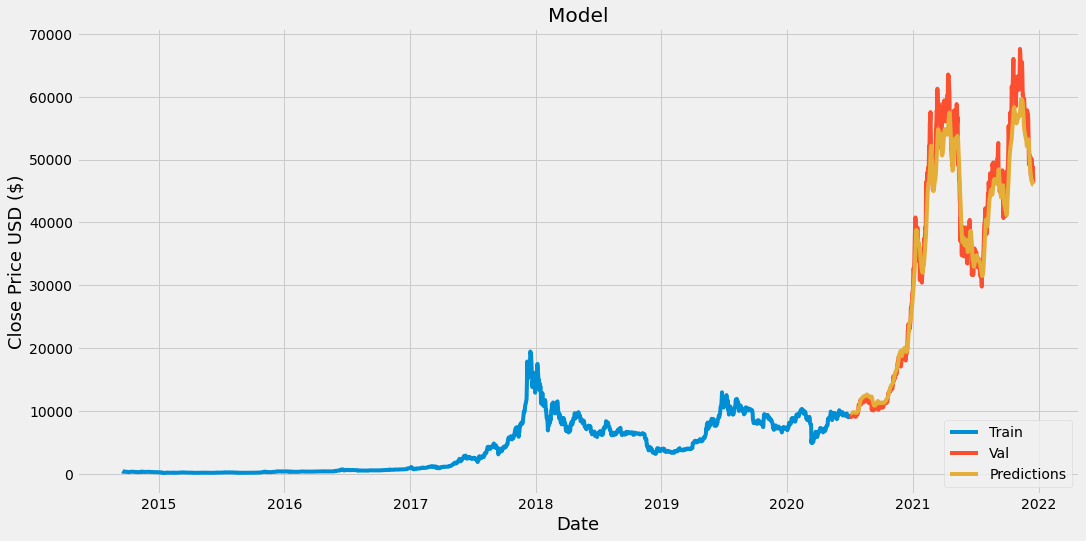

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Show valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-04,9132.488281,9702.910156
2020-07-05,9073.942383,9693.644531
2020-07-06,9375.474609,9679.889648
2020-07-07,9252.277344,9713.377930
2020-07-08,9428.333008,9746.303711
...,...,...
2021-12-13,46737.480469,46678.105469
2021-12-14,46612.632812,46408.628906
2021-12-15,48896.722656,46025.769531
